In [1]:
import os
import sys

In [12]:
#sys.path.append('C:/Users/nitel/Desktop/Git/complex-frogs/cs3220_A6/cs3220_A6_part1/src')
sys.path.append('C:/Users/Justin/Documents/GitHub/complex-frogs/cs3220_A6/cs3220_A6_part1/src')

In [13]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from CSPclass import *
from utils import *

## **Task 1 -10 points**

Imagine that you need to create an exam schedule for the following courses:
1. Algorithms I
2. Introduction to File and Database Management
3. Practical Programming Methodology
4. Computer Organization and Architecture I
5. Linear Algebra I
6. Introduction to Applied Statistics I
7. Operating Systems

*Hint*: in the constraint satisfaction graph each node represents a course


Each course is associated with an initial domain of possible exam days:
1. Algorithms I *{Mon, Tue, Wed}*
2. Introduction to File and Database Management *{Tue}*
3. Practical Programming Methodology *{Mon, Tue, Wed}*
4. Computer Organization and Architecture I *{Mon, Tue, Wed}*
5. Linear Algebra I *{Mon, Tue, Wed}*
6. Introduction to Applied Statistics I *{Wed}*
7. Operating Systems *{Mon, Tue, Wed}*

Main restriction: 2 courses must have exams on different days.

1. Develop CSP implementation for this problem (based on CSP class) - *5 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for Practical Programming Methodology, Computer Organization and Architecture I, Linear Algebra I  - *5 points*

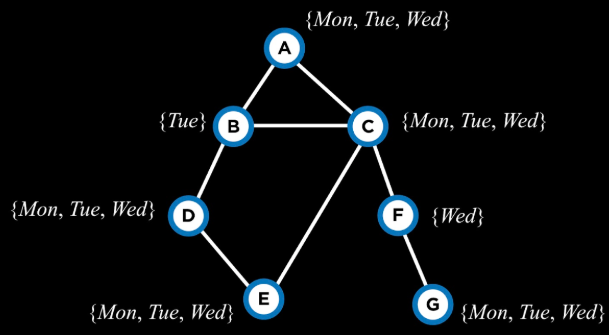

Where: 

    Algorithms I -A
    Introduction to File and Database Management -B
    Practical Programming Methodology C
    Computer Organization and Architecture I D
    Linear Algebra I E
    Introduction to Applied Statistics I F
    Operating Systems G


In [39]:
exams = "A: B C; B: C D; C: E F; D: E; F: G"

In [40]:
examneighbours = parse_neighbors(exams)

In [41]:
domains = {'A': ['Mon', 'Tue', 'Wed'], 'B': ['Tue'], 'C': ['Mon', 'Tue', 'Wed'], 'D': ['Mon', 'Tue', 'Wed'], 'E': ['Mon', 'Tue', 'Wed'], 'F': ['Wed'], 'G': ['Mon', 'Tue', 'Wed']}

In [42]:
constraints = lambda X, x, Y, y: x!=y

In [43]:
examCSP=CSPBasic(variables=None,neighbors=examneighbours, domains=domains, constraints=constraints)

In [44]:
from algorithms import AC3
AC3(examCSP)

Initial queue:
('A', 'B') ('A', 'C') 
('B', 'A') ('B', 'C') ('B', 'D') 
('C', 'A') ('C', 'B') ('C', 'E') ('C', 'F') 
('D', 'B') ('D', 'E') 
('E', 'C') ('E', 'D') 
('F', 'C') ('F', 'G') 
('G', 'F') 
Arc ('A', 'B') is checking
The val Tue was deleted from A domain
[('A', 'C'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('A', 'C') is checking
[('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('B', 'A') is checking
[('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('B', 'C') is checking
[('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F'

(True, 53)

In [45]:
examCSP.curr_domains

{'A': ['Wed'],
 'B': ['Tue'],
 'C': ['Mon'],
 'D': ['Mon', 'Wed'],
 'E': ['Tue', 'Wed'],
 'F': ['Wed'],
 'G': ['Mon', 'Tue']}

In [46]:
letterToCourse = {
    'A': 'Algorithms',
    'B': 'Introduction to File and Database Management',
    'C': 'Practical Programming Methodology',
    'D': 'Computer Organization and Architecture',
    'E': 'Linear Algebra',
    'F': 'Introduction to Applied Statistics',
    'G': 'Operating Systems'
}

In [47]:
for courseKeys in letterToCourse:
    for examKeys in examCSP.curr_domains:
        if courseKeys == examKeys:
            print(letterToCourse[courseKeys], examCSP.curr_domains[examKeys])

Algorithms ['Wed']
Introduction to File and Database Management ['Tue']
Practical Programming Methodology ['Mon']
Computer Organization and Architecture ['Mon', 'Wed']
Linear Algebra ['Tue', 'Wed']
Introduction to Applied Statistics ['Wed']
Operating Systems ['Mon', 'Tue']


In [48]:
for courseKeys in letterToCourse:
    for examKeys in examCSP.curr_domains:
        if courseKeys == examKeys:
            if courseKeys == 'C' or courseKeys == 'D' or courseKeys == 'E':
                print(letterToCourse[courseKeys], examCSP.curr_domains[examKeys])

Practical Programming Methodology ['Mon']
Computer Organization and Architecture ['Mon', 'Wed']
Linear Algebra ['Tue', 'Wed']


## **Task 2 - 10 points**

Modify (enhance) the given code version to make AC-3 applicable for such constraints as the following examples:

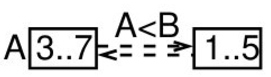

 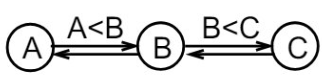

Add the less than and greater than constraint for AC-3

In [43]:
def A_lessThan_B(var1, var2, domains):
    for i in domains[var1]:
        for j in domains[var2]:
            print(f'{i} < {j}')

def B_greaterThan_B(var1, var2, domains):
    for i in domains[var1]:
        for j in domains[var2]:
            if i <= j:
                domains[var1].remove(i)

So we can pass these off as constraints along with a given variable into a dictionary of constraints

Let's test it out

In [44]:
testDict = {
    'A': [1,2,3,4,5],
    'B': [6,7,8,9,10],
    'C': [4,5,6,7,8,9]
}

A_lessThan_B('A','B',testDict)
A_lessThan_B('C', 'B', testDict)

1 < 6
1 < 7
1 < 8
1 < 9
1 < 10
2 < 6
2 < 7
2 < 8
2 < 9
2 < 10
3 < 6
3 < 7
3 < 8
3 < 9
3 < 10
4 < 6
4 < 7
4 < 8
4 < 9
4 < 10
5 < 6
5 < 7
5 < 8
5 < 9
5 < 10
4 < 6
4 < 7
4 < 8
4 < 9
4 < 10
5 < 6
5 < 7
5 < 8
5 < 9
5 < 10
6 < 6
6 < 7
6 < 8
6 < 9
6 < 10
7 < 6
7 < 7
7 < 8
7 < 9
7 < 10
8 < 6
8 < 7
8 < 8
8 < 9
8 < 10
9 < 6
9 < 7
9 < 8
9 < 9
9 < 10


## **Task 3 - 20 points**

### About Asterisk Sudoku

Asterisk Sudoku is a variant of the classic Sudoku, a number placement puzzle traditionally presented in a 9x9 grid, subdivided into 3x3 subgrids or "regions." (aka "house")

The grid partially fills with numbers, referred to as "givens."  - the start state of the puzzle.

The objective is to populate the empty cells in such a way that each number 1 through 9 appears exactly once in each row, column, and region.

In the Asterisk Sudoku variant, an additional constraint is introduced with a specially shaded area, an "asterisk," which must also contain the numbers 1 through 9 without repetition.

 An example of an Asterisk grid in its initial state (left) and solution (right).

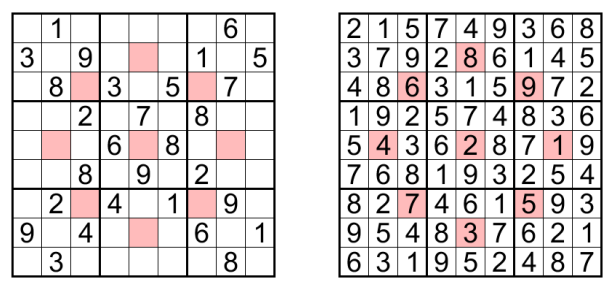

• **A puzzle is solved if**:Every space on the board is given one value between 1 and 9 inclusive.


### Tasks:

1. Develop CSP implementation for Asterisk Sudoku problem (based on CSP class) - *15 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for all cells - *5 points*

In [49]:
var1=list("ABCDEFGHI")
var2=range(1,10)

sudokuNeighbours = {}

for letter in var1:
    for number in var2:
        sudokuNeighbours[letter + str(number)] = []

for key1 in sudokuNeighbours.keys():
    for key2 in sudokuNeighbours.keys():
        if key1 != key2:
            # Deals with neighbours contained in the 3x3 square.
            for letter in [list("ABC"),list("DEF"),list("GHI")]:
                if key1[0] in letter and key2[0] in letter:
                    for number in [range(1,4),range(4,7),range(7,10)]:
                        if eval(key1[1]) in number and eval(key2[1]) in number:
                            sudokuNeighbours[key1].append(key2)
            # Deals with same-row neighbours.
            if key1[0] == key2[0]:
                if key2 not in sudokuNeighbours[key1]:
                    sudokuNeighbours[key1].append(key2)
            # Deals with same-column neighbours.
            elif key1[1] == key2[1]:
                if key2 not in sudokuNeighbours[key1]:
                    sudokuNeighbours[key1].append(key2)
            # Deals with asterisk neighbours.
            asterisk = ['B5','C3','C7','E2','E5','E8','G3','G7','H5']
            if key1 in asterisk:
                for a in asterisk:
                    if a not in sudokuNeighbours[key1] and a != key1:
                        sudokuNeighbours[key1].append(a)

In [50]:
sudokuNeighbours

{'A1': ['A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D1',
  'E1',
  'F1',
  'G1',
  'H1',
  'I1'],
 'A2': ['A1',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D2',
  'E2',
  'F2',
  'G2',
  'H2',
  'I2'],
 'A3': ['A1',
  'A2',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B1',
  'B2',
  'B3',
  'C1',
  'C2',
  'C3',
  'D3',
  'E3',
  'F3',
  'G3',
  'H3',
  'I3'],
 'A4': ['A1',
  'A2',
  'A3',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D4',
  'E4',
  'F4',
  'G4',
  'H4',
  'I4'],
 'A5': ['A1',
  'A2',
  'A3',
  'A4',
  'A6',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D5',
  'E5',
  'F5',
  'G5',
  'H5',
  'I5'],
 'A6': ['A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A7',
  'A8',
  'A9',
  'B4',
  'B5',
  'B6',
  'C4',
  'C5',
  'C6',
  'D6',
  'E6',
  'F6',
  'G6',
  'H6',
  'I6']

In [51]:
filled = {
    'A2': 1, 'A8': 6,
    'B1': 3, 'B3': 9, 'B7': 1, 'B9': 5,
    'C2': 8, 'C4': 3, 'C6': 5, 'C8': 7,
    'D3': 2, 'D5': 7, 'D7': 8,
    'E4': 6, 'E6': 8,
    'F3': 8, 'F5': 9, 'F7': 2,
    'G2': 2, 'G4': 4, 'G6': 1, 'G8': 9,
    'H1': 9, 'H3': 4, 'H7': 6, 'H9': 1,
    'I2': 3, 'I8': 8
}

In [52]:
sudokuDomains={var:[filled[var]] if var in filled else [ch for ch in range(1,10)] for var in sudokuNeighbours.keys()}
sudokuDomains

{'A1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A2': [1],
 'A3': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A4': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A5': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A6': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A7': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'A8': [6],
 'A9': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B1': [3],
 'B2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B3': [9],
 'B4': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B5': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B6': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B7': [1],
 'B8': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'B9': [5],
 'C1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C2': [8],
 'C3': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C4': [3],
 'C5': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C6': [5],
 'C7': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'C8': [7],
 'C9': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D2': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D3': [2],
 'D4': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D5': [7],
 'D6': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D7': [8],
 'D8': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'D9': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'E1': [1, 2, 3,

In [59]:
sudokuConstraints = lambda X, x, Y, y: x!=y

In [60]:
basicSudokuCSP = CSPBasic(variables=sudokuNeighbours.keys(),neighbors=sudokuNeighbours, domains=sudokuDomains, constraints=sudokuConstraints)

In [61]:
from algorithms import AC3
AC3(basicSudokuCSP)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



(True, 25572)

In [62]:
basicSudokuCSP.curr_domains

{'A1': [2, 4, 5, 7],
 'A2': [1],
 'A3': [5, 7],
 'A4': [2, 7, 8, 9],
 'A5': [2, 4, 8],
 'A6': [2, 4, 7, 9],
 'A7': [3, 4, 9],
 'A8': [6],
 'A9': [2, 3, 4, 8, 9],
 'B1': [3],
 'B2': [4, 7],
 'B3': [9],
 'B4': [2, 7, 8],
 'B5': [2, 4, 8],
 'B6': [2, 4, 6, 7],
 'B7': [1],
 'B8': [2, 4],
 'B9': [5],
 'C1': [2, 4],
 'C2': [8],
 'C3': [6],
 'C4': [3],
 'C5': [1, 2, 4],
 'C6': [5],
 'C7': [4, 9],
 'C8': [7],
 'C9': [2, 4, 9],
 'D1': [1, 4, 5, 6],
 'D2': [4, 5, 6, 9],
 'D3': [2],
 'D4': [1, 5],
 'D5': [7],
 'D6': [3, 4],
 'D7': [8],
 'D8': [1, 3, 4, 5],
 'D9': [3, 4, 6, 9],
 'E1': [1, 4, 5, 7],
 'E2': [4, 5, 7, 9],
 'E3': [1, 3, 5, 7],
 'E4': [6],
 'E5': [1, 2, 3, 4, 5],
 'E6': [8],
 'E7': [3, 4, 5, 7, 9],
 'E8': [1, 3, 4, 5],
 'E9': [3, 4, 7, 9],
 'F1': [1, 4, 5, 6, 7],
 'F2': [4, 5, 6, 7],
 'F3': [8],
 'F4': [1, 5],
 'F5': [9],
 'F6': [3, 4],
 'F7': [2],
 'F8': [1, 3, 4, 5],
 'F9': [3, 4, 6, 7],
 'G1': [5, 6, 7, 8],
 'G2': [2],
 'G3': [5, 7],
 'G4': [4],
 'G5': [3, 5, 6, 8],
 'G6': [1],
 'G7